## COG403: Problem 2 of Problem Set 2: Semantic Networks

### All 3 problems for Problem Set 2 Due 1 November 2018, 2 pm

In this question you will be building and experimenting with a semantic network based on the Small World of Words data, to do a partial replication of the Abbott et al. (2015) experiments on a larger free association data set. To build the graph for the semantic network, we will be using the Python library `networkx`. Below are some examples of how to use this library.

In [2]:
import networkx as nx
from provided_functions import plot_graph

# initialize graph
example_graph = nx.DiGraph()

# add nodes
example_graph.add_node('a')
example_graph.add_nodes_from(['b', 'c', 'd'])

# add edges
example_graph.add_edge('a', 'b', weight=0.1)
example_graph.add_edge('a', 'c', weight=0.2)
example_graph.add_edge('c', 'd', weight=0.1)
example_graph.add_edge('a', 'd', weight=0.4)

print("example_graph.nodes() => {}".format(example_graph.nodes()))
print("example_graph.edges() => {}".format(example_graph.edges()))
print("'a' in example_graph => {}".format('a' in example_graph))
print("example_graph['a'] => {}".format(example_graph['a']))
# use provided function to plot graph
plot_graph(example_graph)

example_graph.nodes() => ['c', 'd', 'a', 'b']
example_graph.edges() => [('c', 'd'), ('a', 'c'), ('a', 'd'), ('a', 'b')]
'a' in example_graph => True
example_graph['a'] => {'c': {'weight': 0.2}, 'd': {'weight': 0.4}, 'b': {'weight': 0.1}}
True


/Users/JoshGelua/anaconda3/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


<Figure size 640x480 with 1 Axes>

### (a)

Write a function to build a semantic network from the Small World of Words data using `networkx.DiGraph`. Call your function `get_swow_graph` and write it according to the specifications below. Print a list of all the node labels of nodes that *dog* has an outgoing edge to, as well as the weight of each edge.

Note: do NOT print the entire graph, since it is so large.

Note: only words that occur as cues should be included as nodes in the graph.

In [77]:
import networkx as nx
from provided_functions import plot_graph
from data.animals import ANIMAL_TO_CATEGORIES
import csv
from collections import Counter
SWOW_FILE = 'data/SWOW-EN.R100.csv'


def get_swow_graph(node_threshold=5):
    """
    node_threshold: int -- the number of times a word must occur in the SWOW data to be 
    added as a node to your graph.
    
    Generates a directed, weighted networkx.DiGraph where:
        1. Nodes represent cues from the SWOW data that occur at least node_threhsold times.
           Note: the word 'NA' should not occur as a node.
        2. Outgoing edges from each node sum to 1. These should be proportional to the number of times
           each node occurs as a response to the cue associated with the given node.
        3. The node 'animal' is treated a special case. The outgoing edges from the node 'animal' should
           have a uniform probability over all cues in the SWOW data that are keys in the dict
           ANIMAL_TO_CATEGORIES in the data/animals.py file.
    """
    sum_of_keys = 0
    swow_graph = nx.DiGraph()
    node_weights = {}
    with open(SWOW_FILE, 'rt') as f:
        reader = csv.reader(f)
        SWOW_entries = list(reader)
    for index in SWOW_entries:
        if index[-4] in node_weights:
            node_weights[index[-4]] += 1
        else:
            node_weights[index[-4]] = 1
    node_weights = {node:weights for node, weights in node_weights.items() if weights >= node_threshold}
    weights = {}
    for node in node_weights:
        weights[node] = []
    with open(SWOW_FILE, 'rt') as f:
        reader = csv.reader(f)
        SWOW_entries = list(reader)
    for index in SWOW_entries:
        if index[-4] in node_weights:
            if index [-3] in node_weights:
                weights[index[-4]].append(index[-3])
            if index [-2] in node_weights:
                weights[index[-4]].append(index[-2])
            if index [-1] in node_weights:
                weights[index[-4]].append(index[-1])
    for node in weights:
        swow_graph.add_node(node)
    for cues in ANIMAL_TO_CATEGORIES:
        if cues in node_weights:
            sum_of_keys += 1
    for cues in ANIMAL_TO_CATEGORIES:
        if cues in node_weights:
            swow_graph.add_edge('animal', cues, weight=(1/sum_of_keys))
    for node in weights:
        connecting_node_weight = []
        length_of_node = len(weights[node])
        if node != 'animal':
            for connecting in weights[node]:
                weight = weights[node].count(connecting) / length_of_node
                if (connecting, weight) not in connecting_node_weight:
                    connecting_node_weight.append((connecting, weight))
            for connecting, weight in connecting_node_weight:
                swow_graph.add_edge(node, connecting, weight=weight)

    return swow_graph
    
    
G = get_swow_graph()
print(G['dog'])

{'home': {'weight': 0.004694835680751174}, 'work': {'weight': 0.004694835680751174}, 'lap': {'weight': 0.004694835680751174}, 'waste': {'weight': 0.004694835680751174}, 'buddy': {'weight': 0.004694835680751174}, 'guard': {'weight': 0.004694835680751174}, 'loyal': {'weight': 0.009389671361502348}, 'walk': {'weight': 0.014084507042253521}, 'go': {'weight': 0.004694835680751174}, 'fish': {'weight': 0.004694835680751174}, 'horse': {'weight': 0.009389671361502348}, 'snake': {'weight': 0.004694835680751174}, 'lead': {'weight': 0.009389671361502348}, 'dead': {'weight': 0.004694835680751174}, 'God': {'weight': 0.009389671361502348}, 'stink': {'weight': 0.004694835680751174}, 'caring': {'weight': 0.004694835680751174}, 'track': {'weight': 0.004694835680751174}, 'tongue': {'weight': 0.014084507042253521}, 'golden': {'weight': 0.009389671361502348}, 'puppy': {'weight': 0.046948356807511735}, 'happy': {'weight': 0.018779342723004695}, 'pant': {'weight': 0.004694835680751174}, 'day': {'weight': 0.0

### (b)

In this step, you will visualize your graph using the function `plot_graph` in `provided_functions.py`. Because the actual graph has thousands of nodes, we will visualize a portion of the graph. Write a function `get_subgraph` based on the specifications below. Call `get_subgraph` on your graph with three start nodes: *dog*, *turtle*, and *animal*. For *dog* and *turtle*, use `length=2` and `threshold=0.05`. For *animal*, use `length=1` and `threshold=0`. Call `plot_graph` on each subgraph.

Hint: use the `subgraph` method of networkx graphs.

Note: By default, the `plot_graph` function plots a graph as undirected. For your graphs for this question, please use the default to print them without the arrows. If you are curious and want to experiment, you can make it show the arrows by setting `arrows=True`. The reason it's set to `False` by default is that the way `matplotlib` renders the arrows decreases the interpretability of the graph.

/Users/JoshGelua/anaconda3/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


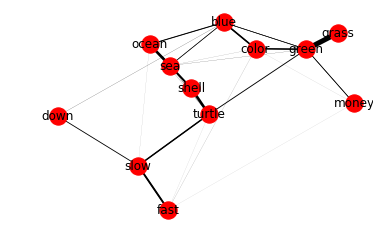

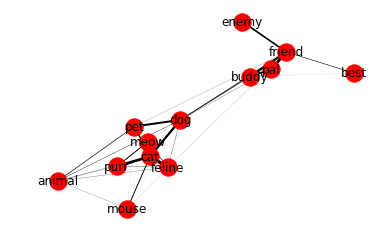

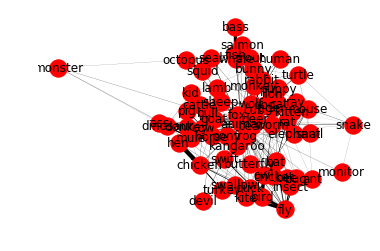

In [73]:
from provided_functions import plot_graph
 
 
def get_subgraph(G, start, length=2, threshold=0.05):
    """
    G: networkx.DiGraph -- semantic network of SWOW data
    start: str -- name of node to start with
    length: int -- the maximum distance a node can be from start to be included in the result.
        The length of a path through the graph is the number of edges needed to get from
        the start node to the end node (e.g. the path from A->B->C is 2).
    threshold: float -- the minimum edge weight required for an edge to be added to the graph
    
    Return a subgraph of G based on a search starting at start. Only include nodes in your graph that 
    have a distance of length or less from your start node. When searching, only add nodes that are
    connected to your graph by an edge with weight threshold or higher.
    """
    point = G[start]
    nodes = [start]
    
    for connecting_nodes in point:
        if point[connecting_nodes]['weight'] >= threshold:
            nodes.append(connecting_nodes)
            
    for i in range(length-1):
        for node in nodes[1:]:
            sub_graph = G[node]
            for sub_node in sub_graph:
                if sub_graph[sub_node]['weight'] >= threshold and sub_node not in nodes:
                    nodes.append(sub_node)
    
    return G.subgraph(nodes)

turtle_graph = get_subgraph(G, 'turtle', length=2, threshold=0.05)
dog_graph = get_subgraph(G, 'dog',length=2, threshold=0.05)
animal_graph = get_subgraph(G, 'animal', length=1, threshold=0)

plot_graph(turtle_graph)
plot_graph(dog_graph)
plot_graph(animal_graph)

### (c)

Write two functions `get_most_likely_walk` and `get_least_likely_walk` that find the most and least likely walks from a given start node. Implement your functions according to the docstrings below.

Call your functions with the graph from part a. In both cases, set `start = 'dog'` and `walk_length = 10`.

In [16]:
def get_most_likely_walk(G, start, walk_length):
    """
    G: networkx.DiGraph -- semantic network of SWOW data
    start: str -- name of node to start with
    walk_length: the length of the walk to return.
    
    Return a list of length walk_length representing a walk. Do not include start in your
    result. Each node in your walk should be most likely node given the previous node. In
    other words, it should be the node that the previous node has the highest weighted
    outgoing edge to.
    
    Do not allow repeats in your walk. For example, say 'fox' is your start node and
    'den' is the most likely node to follow 'fox'. Even if 'fox' is also the most
    likely node to follow 'den', it should not be revisited after we've seen it. In this case,
    you should select the second highest weighted edge.
    """
    walk = []
    point = G[start]
    prob = 0
    for steps in point:
        if point[steps]['weight'] > prob:
            prob = point[steps]['weight']
            step = steps
    walk.append(step)
    for i in range(walk_length):
        after_step = G[step]
        prob = 0
        for steps in after_step:
            if after_step[steps]['weight'] > prob and steps not in walk and steps != start:
                prob = after_step[steps]['weight']
                step = steps
        walk.append(step)
    
    return walk 
print("Starting at dog, the most likely walk is:")
print(get_most_likely_walk(G, 'dog', 10))
    


def get_least_likely_walk(G, start, walk_length):
    """
    G: networkx.DiGraph -- semantic network of SWOW data
    start: str -- name of node to start with
    walk_length: the length of the walk to return.
    
    Return a list of length walk_length representing a walk. Do not include start in your
    result. Each node in your walk should be the least likely node that the previous node has an
    outgoing edge to. (Note that there will be nodes that have a zero probability given
    the previous node, and are not connected to the previous node at all. These should
    not be included.)
    
    Do not allow repeats in your walk. For example, say 'fox' is your start node and
    'rock' is the least likely node to follow 'fox'. Even if 'fox' is also the least
    likely node to follow 'rock', it should not be revisited after we've seen it. In
    this case, you should select the second lowest weighted edge.
    """
    walk = []
    point = G[start]
    prob = 1
    for steps in point:
        if point[steps]['weight'] < prob:
            prob = point[steps]['weight']
            step = steps
    walk.append(step)
    for i in range(walk_length):
        after_step = G[step]
        prob = 1
        for steps in after_step:
            if after_step[steps]['weight'] < prob and steps not in walk and steps != start:
                prob = after_step[steps]['weight']
                step = steps
        walk.append(step)
    
    return walk 
print ("Starting at dog, the least likely walk is:")
print(get_least_likely_walk(G, 'dog', 10))

Starting at dog, the most likely walk is:
['cat', 'feline', 'meow', 'purr', 'kitten', 'cute', 'pretty', 'girl', 'boy', 'child', 'baby']
Starting at dog, the least likely walk is:
['home', 'soon', 'disappointment', 'shame', 'neat', 'careful', 'injury', 'challenge', 'work', 'leisure', 'rich']


### (d)

Write a function `weighted_random_walk` to generate a random walk of length `walk_length` starting at node `start`. The probability of choosing the next node at each step in the walk should be based on your edge weights. You can implement this using `np.random.choice` (take a look at the documentation for the parameter `p`, which allows you to pass a list of weighted probabilities for the items to select from). These random walks (unlike in part c above) should allow revisiting nodes that have been visited before (since this is allowed in the Abbott et al. work).

Your function should return a list of strings representing nodes visited. Implement your function according to the docstring below.

Print the list of strings for a sample walk using the graph from part a with `start = 'animal'` and `walk_length = 50`.

In [48]:
import numpy as np
def weighted_random_walk(G, start, walk_length):
    """
    G: networkx.DiGraph -- semantic network of SWOW data
    start: str -- name of node to start with
    walk_length: the length of the walk to return.
    
    Return a list of length walk_length representing a walk. Do not include start in your
    result. Each node in your walk should be randomly selected based on the weights of the
    outgoing edges of the previous node. A node can be visited more than once.
    """
    point = G[start]
    possible_nodes = []
    corresponding_weights = []
    walk = []
    for node in point:
        possible_nodes.append(node)
        corresponding_weights.append(point[node]['weight'])
    walk.extend(np.random.choice(possible_nodes, 1, corresponding_weights))
    for i in range(walk_length-1):
        after_point = G[walk[-1]]
        possible_nodes = []
        corresponding_weights = []
        for node in after_point:
            possible_nodes.append(node)
            corresponding_weights.append(after_point[node]['weight'])
        walk.extend(np.random.choice(possible_nodes, 1, corresponding_weights))
    return walk
print (weighted_random_walk(G, start='animal', walk_length=50))

['rat', 'nasty', 'girls', 'wonderful', 'special', 'precious', 'movie', 'love', 'red', 'sick', 'juice', 'bar', 'chart', 'boring', 'mundane', 'lame', 'out', 'through', 'during', 'meeting', 'boring', 'time', 'over', 'board', 'bread', 'cat', 'tire', 'gas', 'natural', 'exclude', 'what', 'object', 'desire', 'you', 'others', 'family', 'close', 'shop', 'satisfaction', 'feeling', 'soft', 'hard', 'case', 'carton', 'wood', 'country', 'pride', 'red', 'flag', 'nationality']


### (e)

Write a function `get_animals_and_IRT` according to the docstring below. Your function should return a tuple of (description, animal_list), where:
 * description is a string description. Each line should include a valid `item`, as well as the `steps` between the item and the previous item (ie, the nodes on the path between each pair of responses). A response is a valid item if its label is in `ANIMAL_TO_CATEGORIES` (defined in `data/animals.py`) and it has not been seen previously in the walk.
 * animal_list is a list of tuples of `(item, IRT)`, where item is a valid item, and the IRT is the interitem response time, as defined in Abbott et al.
 
For example, the walk `[animal, dog, pet, cat, dog, bone, dinosaur, lizard]` 

The description would be:

`item: dog       steps:
 item: cat       steps: pet
 item: lizard    steps: dog, bone, dinosaur`

And the animal_list would be:
`[('dog', 1), ('cat', 2), ('lizard', 4)]`

Note that `dog` occurs twice in the random walk, but is only listed as an `item` one time.  Also, we know `dinosaur` is an animal, but it's not listed in `ANIMAL_TO_CATEGORIES`.

Run your function `weighted_random_walk` from part d (with `start = 'animal'` and `walk_length = 50`) until you find a walk with at least 6 valid `items`. Print the random walk, as well as the description and the animal_list returned by `get_animal_and_IRT` called on this walk.

In [69]:
from data.animals import ANIMAL_TO_CATEGORIES


def get_animal_and_IRT(node_list):
    """
    node_list: list of string
    
    Return a tuple (description, animal_list). Where:
      - description is a string in the format shown in the question description above
      - animal_list is a list of tuples of (item, IRT), where item is a unique item, and count
          is the interitem response time, as defined in Abott et al.
    Ignore the nodes visited after the last unique item is found.
    """
    description = ''
    animal_list = []
    index = 0
    for node in node_list:
        walk = []
        if node in ANIMAL_TO_CATEGORIES and node not in description:
            walk.extend(node_list[index:node_list.index(node)])
            index = node_list.index(node)
            description += "item: " + node + ", steps: " + str(walk) + "\n"
            animal_list.append((node, len(walk)+1))
    return (description, animal_list)

animal_list = []
while len(animal_list) < 6:
    random_walk = weighted_random_walk(G, "animal", 50)
    description, animal_list = get_animal_and_IRT(random_walk)
print (description, animal_list)

item: bug, steps: []
item: kitten, steps: ['bug', 'soil', 'sand', 'glass', 'window', 'door', 'go', 'proceed', 'legal', 'no', 'refuse', 'decline', 'train', 'family', 'mammal', 'furry']
item: chicken, steps: ['kitten', 'furry', 'anger', 'face', 'surface', 'milk', 'breakfast', 'club', 'fight', 'mean', 'sister', 'sweet', 'teeth', 'substance', 'product', 'retail', 'market', 'study', 'lesson', 'jerk']
item: turkey, steps: ['chicken']
item: fox, steps: ['turkey', 'breast', 'sexy']
item: hen, steps: ['fox']
 [('bug', 1), ('kitten', 17), ('chicken', 21), ('turkey', 2), ('fox', 4), ('hen', 2)]


### (f)

Here, you'll do an analysis of the IRT pattern in the random walks you generate, somewhat simplified from the Abbott et al. reading.  

First, you'll need to recognize "patch switches": Check for each valid animal item whether it shares a category with the previous valid animal item in the walk.

Second, you'll calculate the mean IRT across the entire walk (mIRT), as well as the mean difference from mIRT at each of three points: At valid animals that constitute a patch switch (position 1), as well as at valid animals one before a patch switch (position -1), and valid animals one after a patch switch (position 2).

Finally, you'll average these values across a set of random walks.

Implement this in the `graph_patch_switches` function below, according to the docstring.  (Note that the walks you pass into the function will be in the format of a list of (item, IRT) tuples returned by the function `get_animal_and_IRT` in part e).

Call `graph_patch_switches` on the two input lists provide in the file `sample_rw_lists.py` and show the graph for each.

Sample 1: 



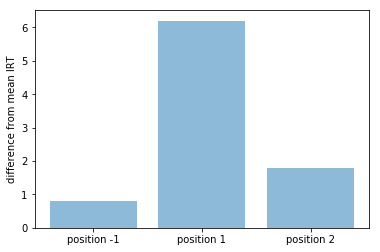

Sample 2: 



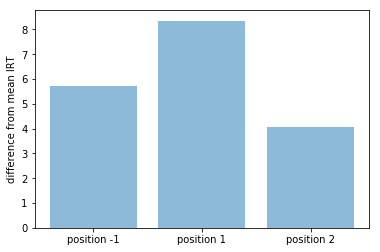

In [105]:
import matplotlib.pyplot as plt
import numpy as np

from data.animals import ANIMAL_TO_CATEGORIES
from sample_rw_lists import sample1, sample2
def generate_plot(triple_averages):
    """
    triple_averages: list of length three representing the difference in mean IRTs at "patch switch"
        positions compared to the overall mean IRT.
        The order should be (position -1, position 1, position 2).
        
    Generate a bar graph of triple_averages.
    """
    y_positions = np.arange(len(triple_averages))
    plt.bar(y_positions, triple_averages, align='center', alpha=0.5)
    plt.xticks(y_positions, ['position -1', 'position 1', 'position 2'])
    plt.ylabel('difference from mean IRT')
    plt.show()


def graph_patch_switches(walks):
    """
    walks: list of list of tuple. Each inner list represents a walk. Each tuple in a walk
        should be of the format (item, IRT), where item is a string representing a valid animal
        in a walk and IRT is an integer indicating the time between this item and the previous one.
    
    Generate a graph of the average difference between overall mean IRT of a walk, and the mean IRT
    at each of three patch switch positions:
        position -1 corresponds to the items just before the first item in a patch switch, 
        position 1 corresponds to the first items in a patch switch, 
        position 2 corresponds to the items in the next position following those in position 1,
            when those next items are in the same patch as the item in position 1.
    Compute the mean IRT for each of the three positions, and the difference between those means
        and the overall mean IRT of each walk.
    Calculate the mean of these differences across all the random walks and plot those using the
        generate_plot function defined above.
    
    """
    aggregate_average_differences_neg_one = []
    aggregate_average_differences_one = []
    aggregate_average_differences_two = []
    for walk in walks:
        position_neg_one_difference = []
        position_one_difference = []
        position_two_difference = []
        animals = []
        IRT_list = []
        for animal, IRT in walk:
            animals.append(animal)
            IRT_list.append(IRT)
        mean_IRT = sum(IRT_list)/len(IRT_list)
        i = 1
        while i < len(walk) - 1:
            if set(ANIMAL_TO_CATEGORIES[animals[i]]).isdisjoint(ANIMAL_TO_CATEGORIES[animals[i-1]]):
                if set(ANIMAL_TO_CATEGORIES[animals[i]]).isdisjoint(ANIMAL_TO_CATEGORIES[animals[i+1]]) is False:
                    position_neg_one = IRT_list[i-1]
                    position_one = IRT_list[i]
                    position_two = IRT_list[i+1]
                    position_neg_one_difference.append(abs(mean_IRT - position_neg_one))
                    position_one_difference.append(abs(mean_IRT - position_one))
                    position_two_difference.append(abs(mean_IRT - position_two))
            i += 1
        if len(position_neg_one_difference) > 0:
            position_neg_one_average = sum(position_neg_one_difference)/len(position_neg_one_difference)
            position_one_average = sum(position_one_difference)/len(position_one_difference)
            position_two_average = sum(position_two_difference)/len(position_two_difference)
            aggregate_average_differences_neg_one.append(position_neg_one_average)
            aggregate_average_differences_one.append(position_one_average)
            aggregate_average_differences_two.append(position_two_average)
    total_mean_position_neg_one = sum(aggregate_average_differences_neg_one)/len(aggregate_average_differences_neg_one)
    total_mean_position_one = sum(aggregate_average_differences_one)/len(aggregate_average_differences_one)
    total_mean_position_two = sum(aggregate_average_differences_two)/len(aggregate_average_differences_two)
    generate_plot([total_mean_position_neg_one, total_mean_position_one, total_mean_position_two])
print ("Sample 1: \n")
graph_patch_switches(sample1)
print ("Sample 2: \n")
graph_patch_switches(sample2)
    

### (g)

Now call `graph_patch_switches` on a list of N walks generated using the graph from part a with `start = 'animal'` and `walk_length = 50`. Only include walks containing 6 or more valid animal items in your analysis. (More specifically, you should generate walks until you have N walks that contain at least 6 valid animal items.)

(i) Run your function with N=20 and show the graph.  Explain whether this matches the patch switch pattern seen in the human data and replicated by Abbott et al.

(ii) Now run your function 10 more times with N=20.  Discuss whether the graphs across these different runs show the same pattern consistently.  Please do not include these graphs in what you turn in.

(iii) Run your function two times with N=1000 random walks (this can take about 2 minutes each), and print the graphs for each of these two runs.  Explain whether the graphs match the patch switch pattern seen in the human data and replicated by Abbott et al.  Are the results consistent across the two runs?

In [108]:
def generate_graph_patch_switches(n):
    walks = []
    for i in range(n):
        animal_list = []
        while len(animal_list) < 6:
            random_walk = weighted_random_walk(G, "animal", 50)
            description, animal_list = get_animal_and_IRT(random_walk)
        walks.append(animal_list)
    graph_patch_switches(walks)

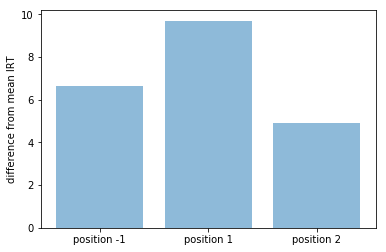

In [112]:
generate_graph_patch_switches(20)

* i) Yes, it matches the graph with position 1 being the highest bar. In the Abbott et al paper, they found similar results. 
* ii) Upon running this function multiple times, my findings were that these graphs are not consistent in showing the same pattern. This leads me to believe that the graph achieved in i) is not reflective of true data and merely by chance led by a small sample of only 20.

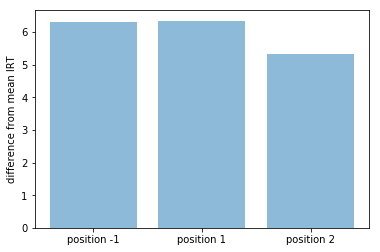

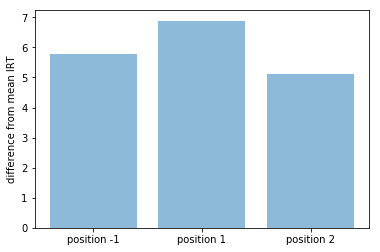

In [114]:
for i in range(2):
    generate_graph_patch_switches(1000)

* iii) Upon running this function with a large sample size we are able to see that the graph does match the patch switch pattern seen in human data and replicated by Abbott et al. Results are generally consistent, with position 1 being the highest bar, position -1 being a little lower, and position -2 being the lowest bar. Such findings from a large random sample show that their replication in the paper is reflective of real world phenomena within semantic network search theory.

### (h)

Write a script to call `get_animals_and_IRT` from part e on 20 random walks of length 50 starting at 'animal'. Write your script so that each random walk contains at least 6 valid animal items. Make sure to clearly number walks 1 - 20.

In [72]:
for i in range(1, 21):
    animal_list = []
    while len(animal_list) < 6:
        random_walk = weighted_random_walk(G, 'animal', 50)
        description, animal_list = get_animal_and_IRT(random_walk)
    print ("Walk "+ str(i) + ": \n")
    print (str(random_walk) + "\n")

Walk 1: 

['salmon', 'river', 'flow', 'grace', 'heaven', 'death', 'gone', 'disappear', 'rid', 'leave', 'return', 'parcel', 'tidy', 'kitchen', 'warm', 'weather', 'sun', 'here', 'rabbit', 'ears', 'elephant', 'hairy', 'dirty', 'sex', 'bare', 'foot', 'loose', 'bird', 'bath', 'England', 'Britain', 'cricket', 'night', 'owl', 'neck', 'smooth', 'water', 'daughter', 'cherish', 'want', 'own', 'room', 'home', 'rest', 'tire', 'car', 'danger', 'risk', 'bet', 'odds']

Walk 2: 

['turtle', 'shell', 'protect', 'lion', 'beautiful', 'pink', 'rose', 'kiss', 'lust', 'nothing', 'endless', 'infinity', 'sign', 'warning', 'sign', 'turn', 'road', 'sign', 'seal', 'fish', 'smoke', 'burn', 'flame', 'light', 'fun', 'puppy', 'chew', 'swallow', 'feathers', 'duck', 'bath', 'steam', 'boat', 'tug', 'pull', 'bull', 'cowboy', 'pants', 'back', 'time', 'being', 'doing', 'thought', 'control', 'careful', 'sign', 'sky', 'space', 'station', 'agent']

Walk 3: 

['monster', 'normal', 'ordinary', 'cat', 'lion', 'den', 'cub', 'bea

Walk 20: 

['kitten', 'puppy', 'soft', 'blanket', 'comforter', 'cover', 'two', 'prime', 'person', 'like', 'person', 'brother', 'relative', 'parent', 'grateful', 'relax', 'ease', 'difficulty', 'sorrow', 'happiness', 'happy', 'circus', 'circus', 'scary', 'ghost', 'fly', 'kite', 'money', 'currency', 'paper', 'cut', 'deep', 'emotion', 'none', 'gone', 'pie', 'tree', 'shade', 'page', 'paper', 'stamp', 'press', 'cork', 'stop', 'halt', 'police', 'protection', 'armor', 'horse', 'mule']



### (i)

(i) Name three different aspects of the paths you see in part h which contribute to the length of a path and which are not simple, direct associations with animal words.  For example, paths such as cat=>pet=>goldfish or tiger=>stripes=>zebra seem to match our intuition about what might trigger chains of responses in human semantic fluency. But you almost certainly found some paths in which chains of associations are longer due to some interesting factors.  Please identify three of these and show an example of each from your paths.

(ii) Also, find a path that you think is particularly funny, and say why.

(iii) How does your inspection of the 20 paths you generated influence your assessment of the findings in Abbott et al.? 

* i) 
* - One contributing factor to the length of a walk are antonyms, such as Walk 19 'lazy' -> 'energetic'. Such antonyms allow future 'steps' of the walk to access more words associated that would not have been overlapped, e.g. 'relaxation -> lazy -> energetic -> soccer'. 
* - Additionally, another contributing factor to the length of a walk is continuation of 'stream of conciousness' that generally occurs as one may expect the next word may be, even though it is not even related to that word. To elaborate, one annoying real world example is the saying 'we finish each other's _ ' where the last word would be 'sentence'. Such 'stream of conciousness' occurs in Walk 14 "slow" -> "poke", and Walk 3 "back" -> "ache".
* - Lastly, another contributing factor to the length of a walk is the phonology of the word. Alliteration, for example, is seen throughout scattered within Walk 6 "sign" -> "sky". Rhyme, for example, is also seen within Walk 19 "grass" -> "ass" and Walk 2 "pull" -> "bull". Such connections do not apppear to have sharing semantics, but these words sound similar to each other.
* ii)
* - Walk 13: 'work' -> 'everyday' -> 'shit' -> 'pain' -> 'ass'. It is funny how a random walk along a semantic network perfectly encapsulates the human condition. I can only imagine the thought process of those who forward associated these words, but I bet all had the disposition: "I work everyday, shit, it's a pain in my ass."
* iii)
* - I am convinced that semantic networks within the mind more likely resembles a random walk than optimal foraging. The evidence they provide in their paper shows that random walks resemble human semantic walks more than optimal foraging. In this assignment, we are able to see that, indeed, the findings of g) reflect the data shown in the Abbott et al paper. Additionally, the random walks in h) show that it is a reflection of rational(and irrational), humanlike, consciousness of thought. Therefore, I am convinced that the Abbott et al paper was accurate in assessing semantic networks as a random walk. 
